In [ ]:
import nltk
nltk.download('stopwords') #liste pré-définie de stopwords
from nltk.corpus import stopwords #attention de bien nettoyer les stopwords !! sinon résultats bizarres

import os
import yake #(Yet Another Keyword Extractor) "that uses text statistical features to select the most important keywords from a document"

from collections import Counter
from wordcloud import WordCloud #besoin de compilateur c++ pour l'installer

from IPython.display import Image

import re #pour les expressions régulières afin de nettoyer l OCRisation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#jouer encore avec cela pour en ajouter des nouveaux en fonction du contexte, modifié de la liste de https://github.com/stopwords-iso/stopwords-fr?tab=readme-ov-file, à verifer sa fidelité
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "elles",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", ":", "même", "voir", "fois", "jour", "année", "ans", "faites", "le", "la", "de"]

# New stopwords to add
git_stopwords = [
    "a", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo", "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au", "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais", "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois", "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez", "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "bah", "bas", "basee", "bat", "beau", "beaucoup", "bien", "bigre", "bon", "boum", "bravo", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain", "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun", "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables", "compris", "concernant", "contre", "couic", "crac", "dans", "de", "debout", "dedans", "dehors", "deja", "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different", "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement", "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit", "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début", "désormais", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue", "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes", "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait", "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent", "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "gens", "haut", "hein", "hem", "hep", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé", "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "la", "laisser", "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque", "lui", "lui-meme", "lui-même", "là", "lès", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale", "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale", "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même", "mêmes", "na", "n'a" "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf", "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes", "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "oh", "ohé", "ollé", "olé", "on", "ont", "onze", "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "où", "paf", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant", "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne", "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf", "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour", "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement", "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui", "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable", "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "sa", "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble", "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez", "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous", "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles", "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet", "superpose", "sur", "surtout", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement", "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres", "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "un", "une", "unes", "uniformement", "unique", "uniques", "uns", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous", "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "zut", "à", "â", "ça", "ès", "étaient", "étais", "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"
]

#domaine specific 
specific_stopwords = [
"rue", "-", "drapeau", "DRAPEAU", "LE", "ROUGE", "com", "qu'il", "d'une", "d'un", "l'on", "qu'il", "qu'ils", "qu'elle", "qu'elles", "qu", "il", "elle", "c", "est", "elles", "ils", "vient", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "soir", "ment", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "déjà"
#garder les noms des villes pour faire une analyse spatiale? 
#does it also include common first names?
#does it also include uppercase versions?
#à voir : soir, matin = seront pe liés au nom du journal et non du temps de la journée, define what a stopword means in this context
]

#stop words supplémentaires de nltk
stops = set(stopwords.words('french'))

sw += git_stopwords
sw += specific_stopwords
sw += stops
sw = set(sw)


print(f"{len(sw)} stopwords:\n {sorted(sw)}")

723 stopwords:
 ['-', ':', 'DRAPEAU', 'LE', 'ROUGE', 'a', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'allaient', 'allo', 'allons', 'allô', 'alors', 'année', 'ans', 'anterieur', 'anterieure', 'anterieures', 'août', 'apres', 'après', 'as', 'assez', 'attendu', 'au', 'aucun', 'aucune', 'aucuns', 'aujourd', "aujourd'hui", 'aupres', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autant', 'autre', 'autrefois', 'autrement', 'autres', 'autrui', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bah', 'bas', 'basee', 'bat', 'beau', 'beaucoup', 'bien', 'bigre', 'bon', 'boum', 'bravo', 'c', 'car', 'ce', 'ceci', 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui', 'celui-ci', 'celui-là', 'celà', 'c

In [56]:
#Tokenize each file individually then save each token in a dictionary
#I think it's best to first see all of they keywords per file before aggregating and then doing one big word cloud for the whole set, or just a certain period. I would've wanted to compare the wordcloud of the different periods ngl. I mean, at least I could do that for la libre belgique or whatever it was that was also reporting in 1835

data_path = "../../data/halley/halley_txt/"
tokenised_files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

tokens_by_file = {}

for filename in tokenised_files:
    filepath = os.path.join(data_path, filename)
    
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read() # Récupérer le texte du fichier individualement 

    
    # Tokenize
    tokens = nltk.wordpunct_tokenize(text) # Extraire les tokens du texte en cours
    
    # Filtrer les tokens =>  garder les mots de plus de 2 lettres, alphabétiques et pas dans les stopwords, les autres sont des mots parasites
    filtered_tokens = [w.lower() for w in tokens 
                      if len(w) > 2 # Ne garder que les mots de plus de 2 lettres
                      if w.isalpha() 
                      and w.lower() not in sw #filterer pour les stopwords et les lowercase
                      and not re.search(r'(.)\1{2,}', w.lower())] #filtrer les lettres qui se repetent avec un regex
    
    tokens_by_file[filename] = filtered_tokens

print(len(tokenised_files))


551


In [57]:
# Combine ALL filtered tokens from all files into one list
all_tokens = []
for tokens in tokens_by_file.values():
    all_tokens.extend(tokens)

# Now calculate frequency across all files
fdist = nltk.FreqDist(all_tokens)
fdist.most_common(50)

print(f"Total tokens across all files: {len(all_tokens)}")
print(f"Unique words: {len(fdist)}")

Total tokens across all files: 1557735
Unique words: 217939


In [58]:
#récupérer la fréquence des mots sur toute le dataset 
fdist = nltk.FreqDist(all_tokens) #why do I get the impression this is only working for part of the files
fdist.most_common(50)

#voisins plus proches to halley would be useful
#or maybe we do a co-text analysis of words around halley?

[('heures', 4175),
 ('bruxelles', 3618),
 ('grand', 3095),
 ('prix', 2688),
 ('temps', 2602),
 ('lieu', 2568),
 ('comète', 2556),
 ('francs', 2549),
 ('mois', 2363),
 ('grande', 2281),
 ('pays', 2235),
 ('paris', 2222),
 ('matin', 2082),
 ('belgique', 2075),
 ('jours', 2044),
 ('ministre', 1970),
 ('saint', 1967),
 ('cours', 1893),
 ('gouvernement', 1890),
 ('ville', 1844),
 ('point', 1816),
 ('maison', 1740),
 ('président', 1733),
 ('belge', 1709),
 ('chambre', 1708),
 ('général', 1704),
 ('place', 1684),
 ('terre', 1670),
 ('roi', 1664),
 ('part', 1615),
 ('france', 1560),
 ('midi', 1536),
 ('heure', 1516),
 ('moment', 1515),
 ('travail', 1466),
 ('homme', 1459),
 ('conseil', 1446),
 ('partie', 1430),
 ('question', 1428),
 ('liège', 1421),
 ('vie', 1411),
 ('société', 1407),
 ('loi', 1400),
 ('nouvelle', 1388),
 ('monde', 1382),
 ('exposition', 1374),
 ('ordre', 1362),
 ('soleil', 1341),
 ('nombre', 1320),
 ('hier', 1286)]

In [59]:
kw_extractor = yake.KeywordExtractor(
    lan="fr", 
    top=50,
    stopwords=sw, 
    n=1  # Extract up to bigrams (unigrams + bigrams)
)

all_token_keywords = {}

for filename in sorted(tokens_by_file.keys())[:10]:
    # 1. Get pre-filtered tokens for this file
    filtered_tokens = tokens_by_file[filename]
    
    # 2. Convert token list back to text
    text_from_tokens = ' '.join(filtered_tokens)
    
    # 3. Extract keywords using YAKE
    token_keywords = kw_extractor.extract_keywords(text_from_tokens)
    
    # 4. Store in dictionary
    all_token_keywords[filename] = token_keywords

Top 100 keywords: ['grand', 'belgique', 'heures', 'comète', 'grande', 'terre', 'bruxelles', 'maison', 'petit', 'temps', 'pays', 'service', 'fer', 'petite', 'point', 'monde', 'soleil', 'également', 'village', 'mort', 'roi', 'francs', 'saint', 'parti', 'hier', 'nom', 'ville', 'général', 'étoiles', 'filantes', 'charles', 'comètes', 'soviétique', 'union', 'amateurs', 'moscou', 'traitement', 'vie', 'jamais', 'moment', 'peuple', 'oui', 'duc', 'congrès', 'cas', 'paris', 'con', 'ministre', 'billets', 'matin', 'guerre', 'marks', 'ligne', 'coup', 'nouvelle', 'luxembourg', 'frais', 'arlon', 'société', 'enfant', 'gouvernement', 'eau', 'albert', 'conseil', 'prince', 'palais', 'rayon', 'local', 'habituel', 'tomes', 'federation', 'ghetto', 'chant', 'académie', 'orateur', 'fragments', 'edison', 'phonographe', 'accu', 'météorites', 'cliant', 'sciences', 'cellule', 'gaz', 'canot', 'piano', 'bornes', 'recherches', 'rouge', 'obtenir', 'listes', 'sol', 'petits', 'rêveurs', 'cros', 'tome', 'poussière', 'rus

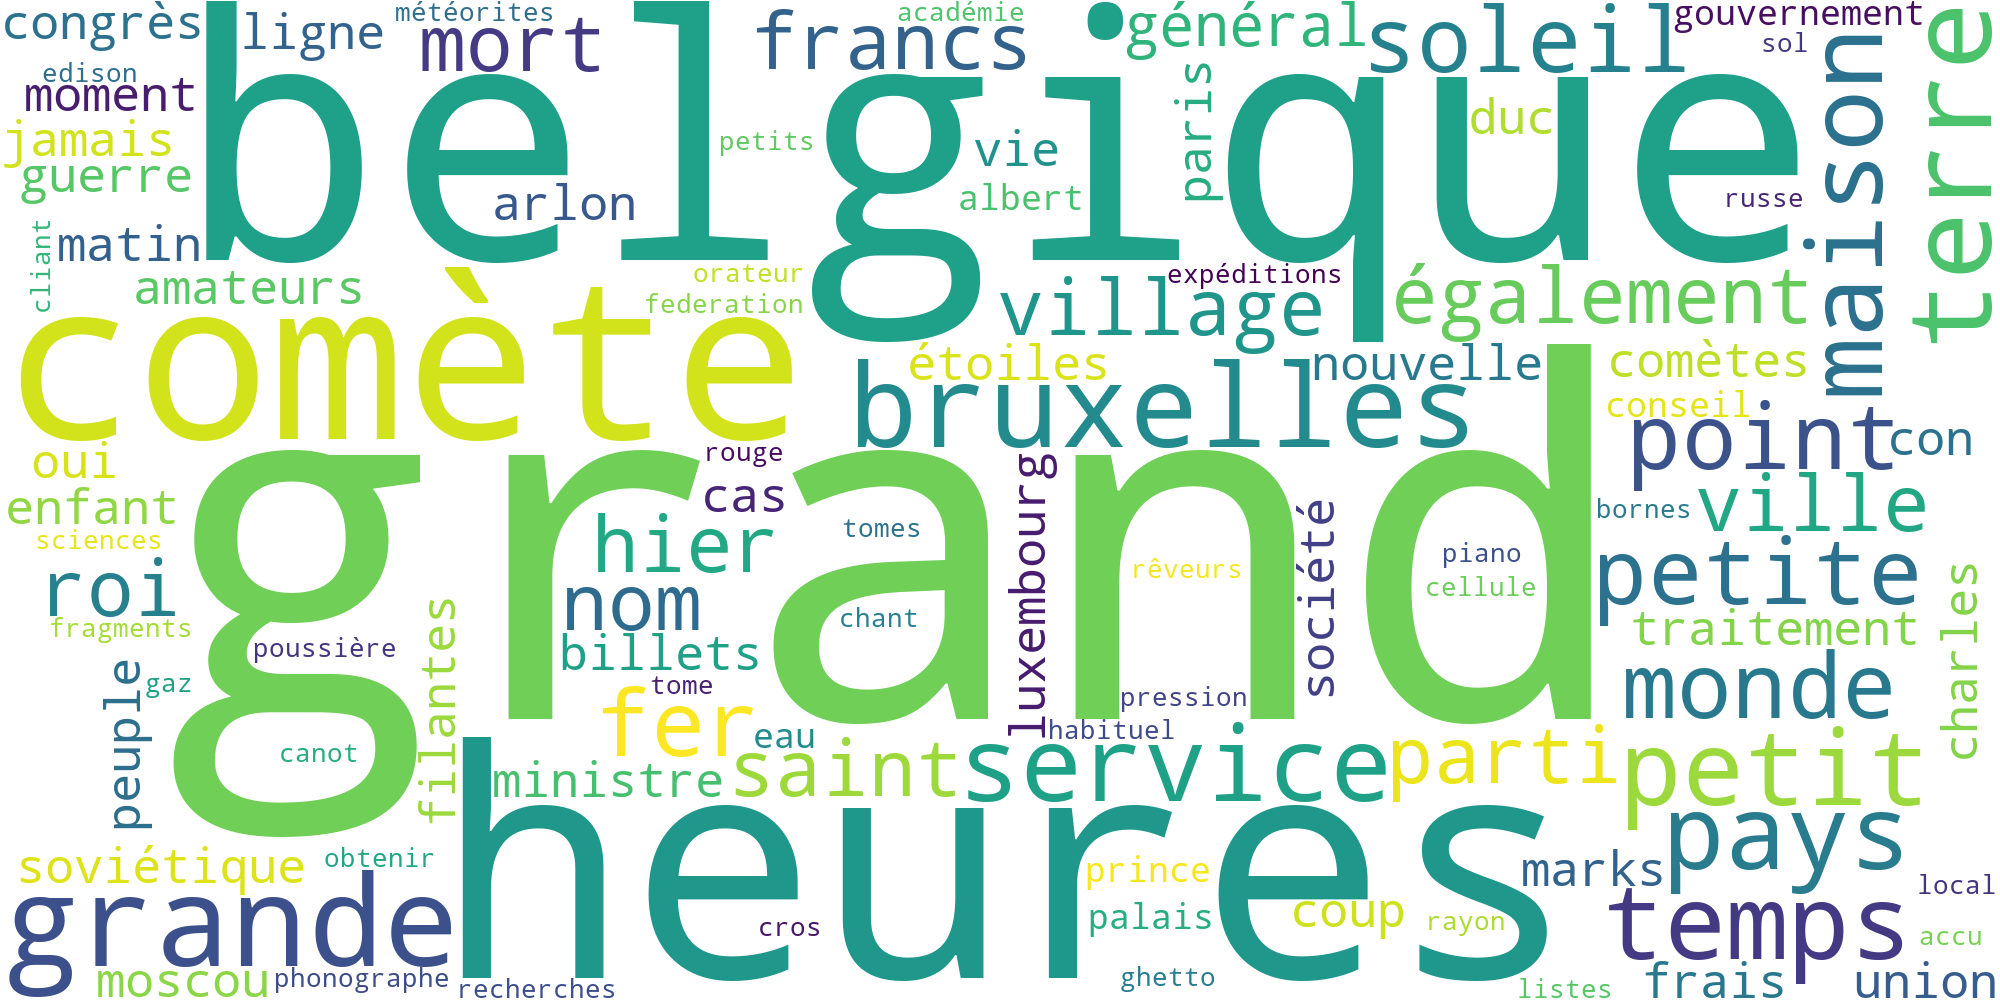

In [60]:
# Word cloud of top 50 keywords from all files

# Flatten all keywords
all_keywords_flat = [kw for kws in all_token_keywords.values() for kw, score in kws]

# Count frequencies
keyword_freq = Counter(all_keywords_flat)
top_100 = dict(keyword_freq.most_common(100))

print(f"Top 100 keywords: {list(top_100.keys())}")

# Create and save word cloud
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(top_100)
cloud.to_file(os.path.join(temp_path, "halley_keywords_top50.png"))
Image(filename=os.path.join(temp_path, "halley_keywords_top50.png"))